In [1]:
import random as rd
import math as mt
import matplotlib.pyplot as plt

In [2]:
semilla = int((101187 + 102323 + 102291 + 102321) / 4)
Xo = semilla
def generador_congruencial_lineal_normalizado(iteraciones):
  m=2**32
  a=1013904223
  c=1664525
  global Xo

  numeros_aleatorios = []
  for i in range(0,iteraciones):
    X = (a * Xo + c) % m
    numeros_aleatorios.append(X/m)
    Xo = X
  return numeros_aleatorios

In [3]:
#Funciones auxiliares

#El cuadrado esta delimitado por las rectas:
#1) y = x + 5.sqrt(2)
#2) y = -x + 40 - 5.sqrt(2)
#3) y = x - 5.sqrt(2)
#4) y = -x + 40 + 5.sqrt(2)

def esta_en_la_region(tupla_xy):
    if (tupla_xy[0] > 20 + 5 * mt.sqrt(2)) or (tupla_xy[0] < 20 - 5 * mt.sqrt(2)):
        return false
    if tupla_xy[0] <= 20:
        return (tupla_xy[1] <= (tupla_xy[0] + 5 * mt.sqrt(2))) and \
               (tupla_xy[1] >= (-tupla_xy[0] + 40 - 5 * mt.sqrt(2)))
    return (tupla_xy[1] >= (tupla_xy[0] - 5 * mt.sqrt(2))) and \
               (tupla_xy[1] <= (-tupla_xy[0] + 40 + 5 * mt.sqrt(2)))   

def desplazar(x, y):
    nuevo_x = x*mt.cos(mt.pi/4)-y*mt.sin(mt.pi/4) + 20
    nuevo_y = x*mt.sin(mt.pi/4)+y*mt.cos(mt.pi/4) + 20 - 5* mt.sqrt(2)
    return (nuevo_x, nuevo_y)
    
def rand_estandar():
    return rd.uniform(0,10)
    
def rand_propio():
    return generador_congruencial_lineal_normalizado(1)[0] * 10
    

#Se puede generar un cuadrado de las dimensiones pedidas (arista de 10) y después rotar y trasladar los puntos
#generados en ese cuadrado, teniendo asi un rendimiento de 1
#Rotacion: x' = x.cos(pi/4)-y.sen(pi/4)
#          y' = x.sen(pi/4)+y.cos(pi/4)
#Traslacion: x'' = x'+20
#            y'' = y'+20-5.sqrt(2)
    
#Genera un cuadrado usando la funcion generadora de numeros random que reciba
def generar_random_cuadrado(cant_numeros, rand_func):
    ret = []
    aux = 0
    nros_totales_generados = 0
    nros_validos_generados = 0
    while (nros_validos_generados < cant_numeros):
        aux = desplazar(rand_func(), rand_func())
        if (esta_en_la_region(aux)):
            ret.append(aux)
            nros_validos_generados += 1
        nros_totales_generados += 1
    return (nros_validos_generados/nros_totales_generados, ret)

Se  desea  generar  puntos  al  azar con  distribución uniforme dentro del área descripta en  el  gráfico utilizando  los  siguientes generados de números al azar:

a) Generadores de números al azar con distribución uniforme, provistos por el lenguaje elegido para resolver el tp

b) Generadores de números al azar implementados con el algoritmo del ejercicio 1.

c) Calcule el factor de rendimiento del método.

d)Proponga el test que considere necesario para demostrar que los números generados siguen la distribución pedida.

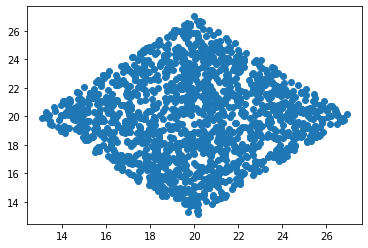

Factor de rendimiento: 1.0


In [4]:
#A)
def rand_cuadrado_estandar(cant_numeros):
    return generar_random_cuadrado(cant_numeros, rand_estandar)

randoms = rand_cuadrado_estandar(1500)
plt.scatter(*zip(*randoms[1]))
plt.show()
print("Factor de rendimiento: " + str(randoms[0]))

#Hacer test para la distribucion

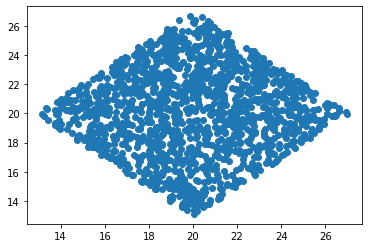

Factor de rendimiento: 1.0


In [5]:
#B)
def rand_cuadrado_propio(cant_numeros):
    return generar_random_cuadrado(cant_numeros, rand_propio)

randoms = rand_cuadrado_propio(1500)
plt.scatter(*zip(*randoms[1]))
plt.show()
print("Factor de rendimiento: " + str(randoms[0]))
#Hacer test para la distribucion

In [15]:
#Para ver si los puntos estan distribuidos de forma uniforme en la region del cuadrado se puede generar 
#un sistema de coordenadas situado en la punta izquierda de la región pegado al perímetro de la región y
#con este ver si tanto la posicion x como la y siguen distribuciones uniformes, para esto se usara el test de
#Chi**2 discretizando las variables

def trasladar_puntos(puntos_x_y):
    ret = []
    aux = 0
    for i in range(len(puntos_x_y)):
        aux = puntos_x_y[i]
        u = (aux[0] - aux[1] - 5 * mt.sqrt(2)) * (mt.sqrt(2)/2)
        v = (aux[0] + aux[1] + 5 * mt.sqrt(2) - 40) * (mt.sqrt(2)/2)
        ret.append((u, v))
    return ret
        
def separar_en_listas(tuplas):
    primer_elemento = []
    segundo_elemento = []
    for i in range(len(tuplas)):
        primer_elemento.append(tuplas[i][0])
        segundo_elemento.append(tuplas[i][1])
    return (primer_elemento, segundo_elemento)
    
def es_uniforme(valores):
    ancho_sturgues = 10/(1+mt.log(len(valores, 2)))
    
def test_uniformidad(puntos_generados):
    puntos_u_v = trasladar_puntos(puntos_generados)
    lista_u, lista_v = separar_en_listas(puntos_u_v)


test_estandar([(1,1),(1,2),(1,3),(1,4)])

3.0